In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Tuple, Dict
from agent import ConstantEpsilonFunction, QAgent, RandomAgent, BaseAgent
from tictacenv import TicTacEnvironment
from collections import defaultdict


In [6]:
def play_random_x_rounds(
    agents: Tuple[BaseAgent, BaseAgent],
    environment: TicTacEnvironment,
    x: int,
) -> Dict[str, int]:
    """Simulates several tic tac toes rounds
    where agents get no reward. Use it track learning progress.

    Args:
        agents: Tuple of agents
        environment: environment
        x: amount of rounds to play
    """
    players = defaultdict(lambda: 0)
    agent2player_dict = {
        random_agent: "random",
        q_agent: "q_agent",
    }
    for _ in range(x):
        state = environment.reset()
        is_over = False
        while not is_over:
            for p in agents:
                action = p.get_action(*state, 1.0)
                reward, state, is_over = environment.step(*action)
                if reward == 1:
                    player = agent2player_dict[p]
                    players[player] += 1
                if is_over:
                    break
    return players

def main(agents, num_epochs: int = 100_000, x: int = 500) -> Dict[str, int]:
    """Trains agents for num_epochs and returns dict with a results.
    
    Args:
        agents: Tuple of agents
        num_epochs: amount of epochs in training process
        x: amount of trials with no reward to track progress
    """
    
    results = {
        "random":[],
        "q": [],
    }
    for i in range(num_epochs):
        state = env.reset()
        is_over = False
        while not is_over:
            for p in agents:
                action = p.get_action(*state)
                reward, state, is_over = env.step(*action)
                p.set_reward(reward)
                if is_over:
                    break
        # We want to track out progress so each 1000 epochs agents play a X rounds at random
        if i % 1000 == 0:
            res = dict(play_random_x_rounds(agents, env, x=x))
            results["random"].append(res["random"])
            results["q"].append(res["q_agent"])
    q_agent.dump_q_matrix("q_matrix.pkl")
    return results


Проведем два эксперимента -- когда первым ходим Random Agent и когда первым ходит Q Agent.
Ожидаем что во всех экспериментах лучше окажется Q Agent.

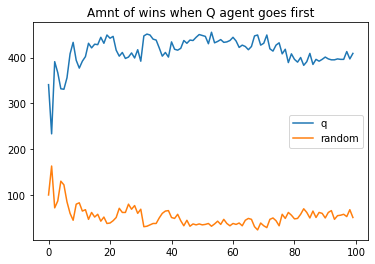

In [7]:
from matplotlib import pyplot as plt

q_agent_policy = ConstantEpsilonFunction(0.1)
random_agent = RandomAgent(-1)
env = TicTacEnvironment()
q_agent = QAgent(1, "", q_agent_policy)
agents = (q_agent, random_agent)

results = main(agents)

plt.title("Amnt of wins when Q agent goes first")
plt.plot(results["q"], label="q")
plt.plot(results["random"], label="random")
plt.legend()
plt.show()

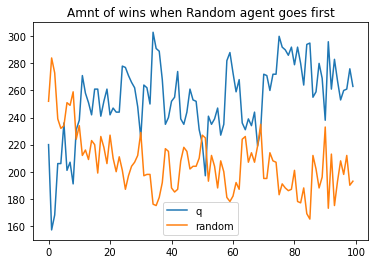

In [8]:
random_agent = RandomAgent(-1)
env = TicTacEnvironment()
q_agent = QAgent(1, "", q_agent_policy)
agents = (random_agent, q_agent)

results = main(agents)

plt.title("Amnt of wins when Random agent goes first")
plt.plot(results["q"], label="q")
plt.plot(results["random"], label="random")
plt.legend()
plt.show()